# PGM - finedust Bayesian Modeling

In [1]:
import pymc3
from PGM.access_data import dbAccess

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pvId = "10"
year = "2016"
db = dbAccess("PGM/%s_db_%s.csv" % (pvId,year))
data = db.get_data("2016-01-01 01:00", "2016-01-01 21:00","PM10","PM25","SO2", "O3")

PGM/10_db_2016.csv
('PM10', 'PM25', 'SO2', 'O3')
[{'idx': 2, 'arg': 'PM10'}, {'idx': 3, 'arg': 'PM25'}, {'idx': 4, 'arg': 'SO2'}, {'idx': 6, 'arg': 'O3'}]
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 'arg': 'PM25'}
{'idx': 4, 'arg': 'SO2'}
{'idx': 6, 'arg': 'O3'}
{'idx': 2, 'arg': 'PM10'}
{'idx': 3, 

In [3]:
print(data)

[{'time': '2016-01-01 01:00:00', 'PM10': '51', 'PM25': '30', 'SO2': '0.003', 'O3': '0.020'}, {'time': '2016-01-01 02:00:00', 'PM10': '50', 'PM25': '32', 'SO2': '0.002', 'O3': '0.019'}, {'time': '2016-01-01 03:00:00', 'PM10': '46', 'PM25': '33', 'SO2': '0.002', 'O3': '0.017'}, {'time': '2016-01-01 04:00:00', 'PM10': '46', 'PM25': '32', 'SO2': '0.002', 'O3': '0.017'}, {'time': '2016-01-01 05:00:00', 'PM10': '47', 'PM25': '31', 'SO2': '0.002', 'O3': '0.017'}, {'time': '2016-01-01 06:00:00', 'PM10': '48', 'PM25': '30', 'SO2': '0.002', 'O3': '0.015'}, {'time': '2016-01-01 07:00:00', 'PM10': '45', 'PM25': '31', 'SO2': '0.002', 'O3': '0.014'}, {'time': '2016-01-01 08:00:00', 'PM10': '50', 'PM25': '31', 'SO2': '0.002', 'O3': '0.013'}, {'time': '2016-01-01 09:00:00', 'PM10': '49', 'PM25': '28', 'SO2': '0.002', 'O3': '0.011'}, {'time': '2016-01-01 10:00:00', 'PM10': '51', 'PM25': '32', 'SO2': '0.003', 'O3': '0.014'}, {'time': '2016-01-01 11:00:00', 'PM10': '64', 'PM25': '34', 'SO2': '0.003', 'O3

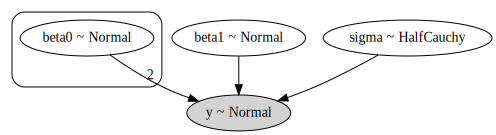

In [4]:
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz

with Model() as unpooled_model:

    beta0 = Normal('beta0', 0, sigma=1e5, shape=2)
    beta1 = Normal('beta1', 0, sigma=1e5)
    sigma = HalfCauchy('sigma', 5)

    theta = beta0[0] + beta1*2

    y = Normal('y', theta, sigma=sigma, observed=2)
model_to_graphviz(unpooled_model)
